## Feature engineering

## Predicting Heart Failure



In [2]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Loading the dataset

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Exploratory data analysis and Feature engineering. 

In [5]:
## Checking if the data is balanced or imbalanced and the shape of the data. 

print('Size of the data: {}'.format(data.shape))

print('Value counts :{}'.format(data['DEATH_EVENT'].value_counts()))

## Data is not completely imbalanced. 

Size of the data: (299, 13)
Value counts :0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
## Checking the missing values.

print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [9]:
## Data has only numerical features and no categorical features

## Descrete and continous features

descrete_features = [feature for feature in data.columns if len(data[feature].unique())<12]

In [10]:
descrete_features.remove('DEATH_EVENT')

In [11]:
descrete_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [16]:
continous_features = [feature for feature in data.columns if feature not in descrete_features]

In [17]:
continous_features.remove('DEATH_EVENT')

In [19]:
continous_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

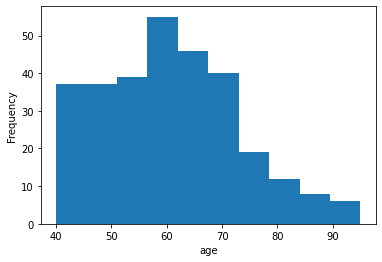

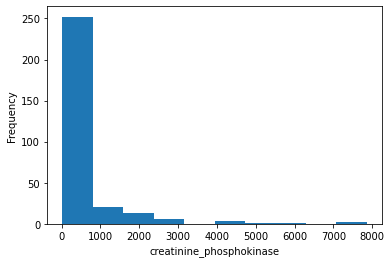

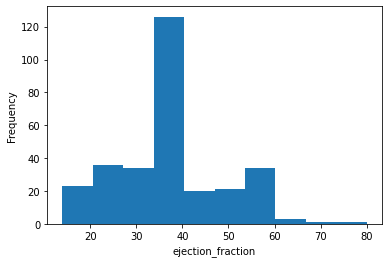

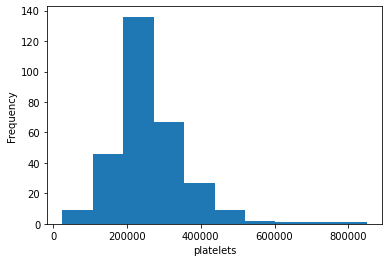

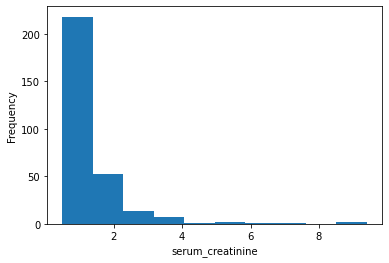

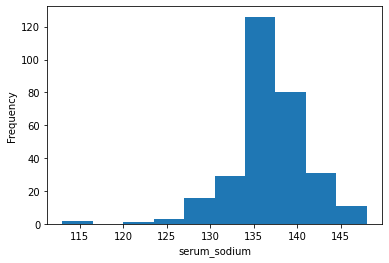

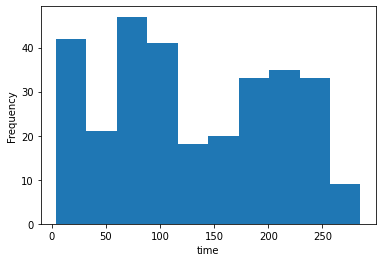

In [59]:
## Lets check the distribution of continous features

for feature in continous_features:
    data[feature].plot.hist(bins=10)
    plt.xlabel(feature)
    plt.show()

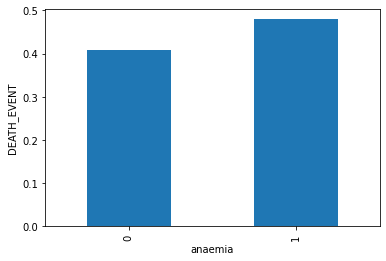

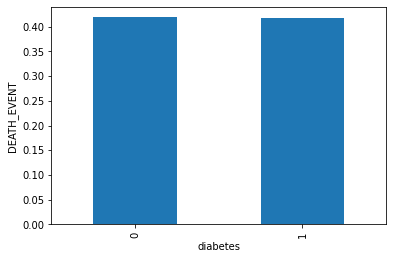

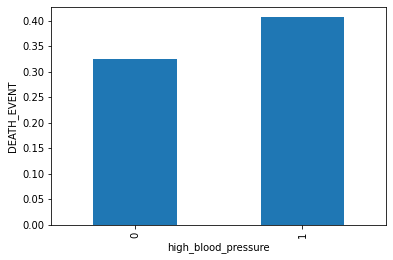

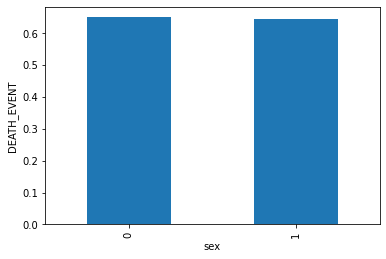

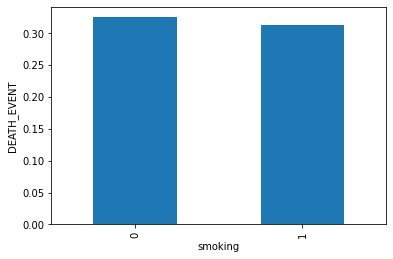

In [65]:
## Lets check the counts of the descrete_feature w.r.t output.

for feature in descrete_features:
    data.groupby(['DEATH_EVENT'])[feature].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('DEATH_EVENT')
    plt.show()

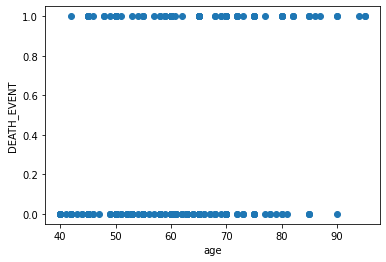

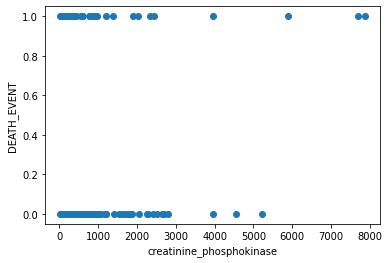

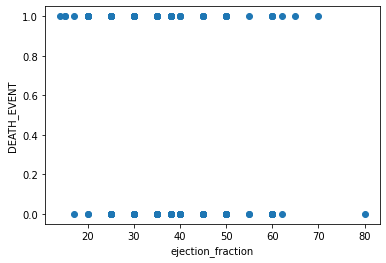

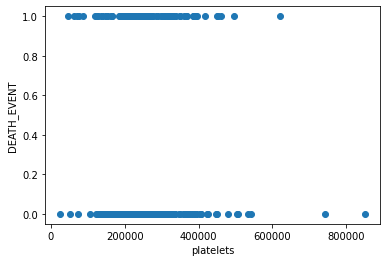

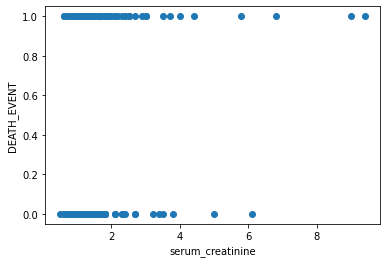

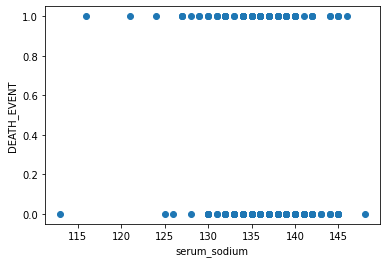

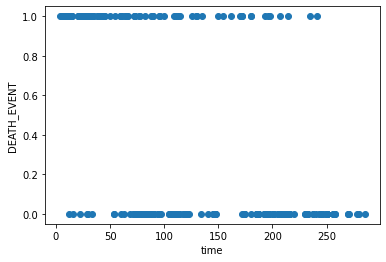

In [86]:
## Checking scatter plot for continous features
for feature in continous_features:
    plt.scatter(x=data[feature],y=data['DEATH_EVENT'])
    plt.xlabel(feature)
    plt.ylabel('DEATH_EVENT')
    plt.show()

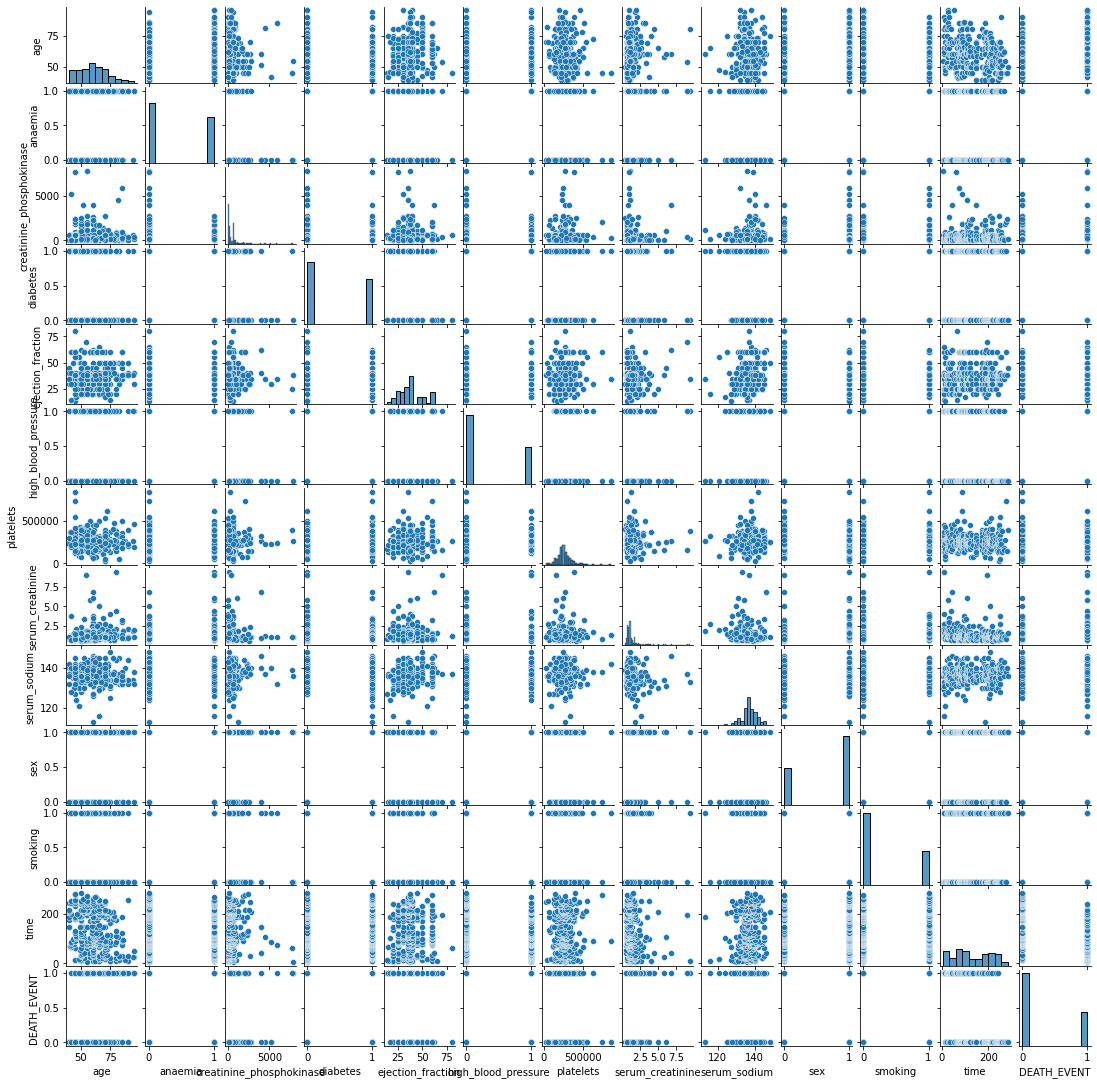

In [81]:
## lets cehck the scatter plot for all the variables 

g = sns.pairplot(data=data)
g.fig.set_size_inches(15,15)
plt.show()

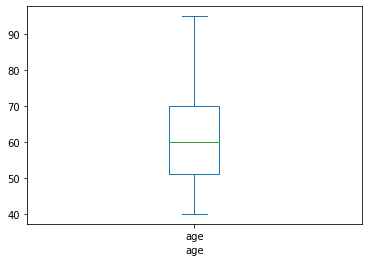

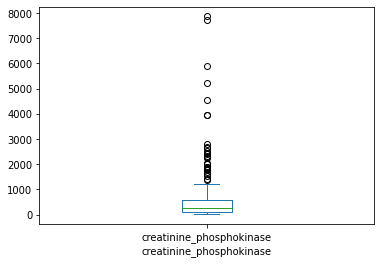

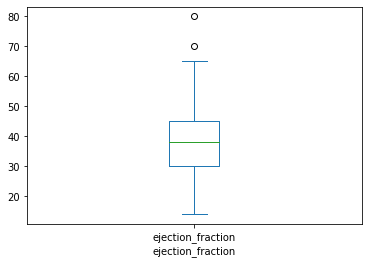

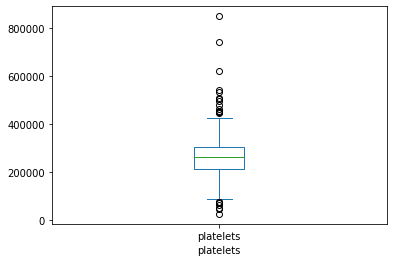

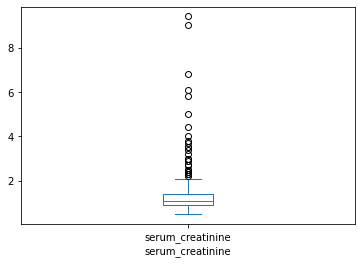

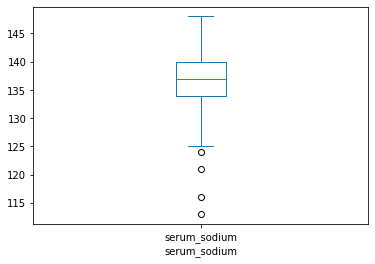

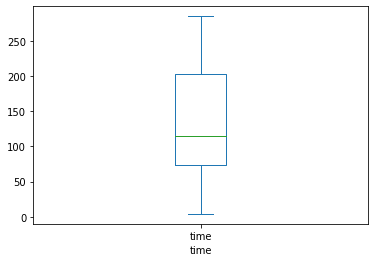

In [91]:
## Outliers in continous features

for feature in continous_features:
    data[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

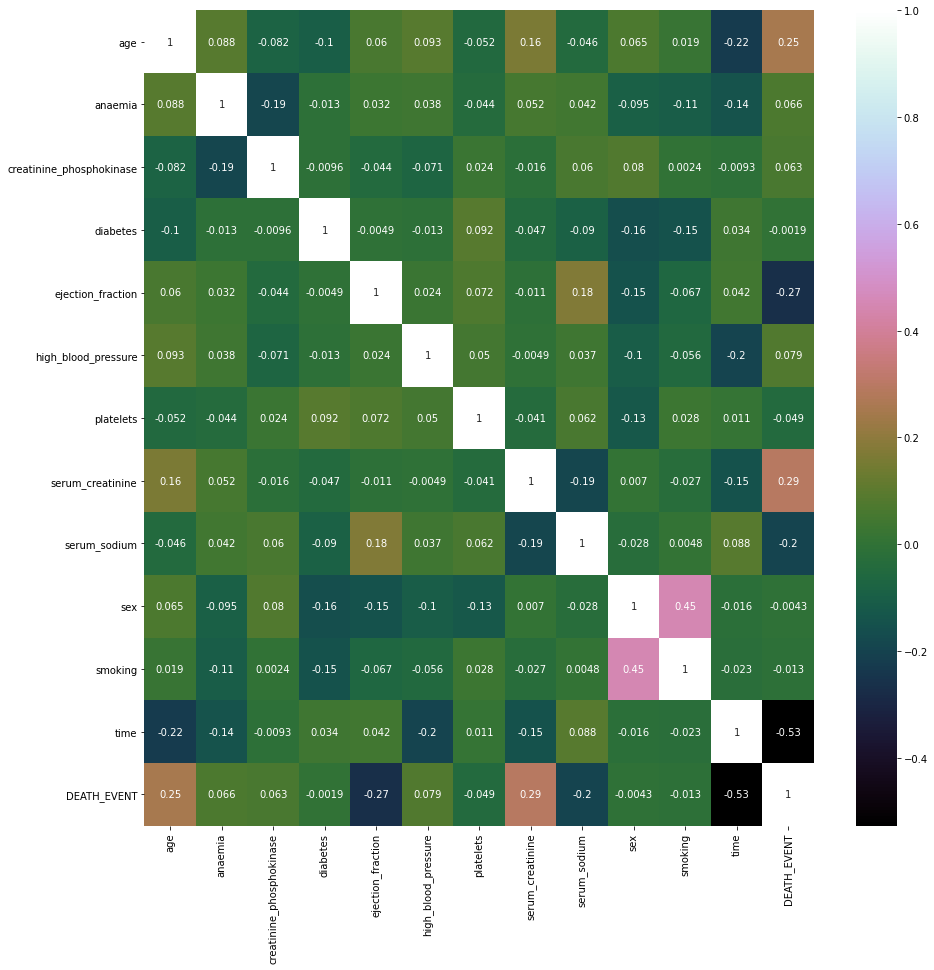

In [125]:
## Lets check the correlation 

cor = sns.heatmap(data.corr(),annot=True,cmap="cubehelix")
cor.figure.set_size_inches(15,15)

In [129]:
## There are mo highly correlated features



In [130]:
## Defining the X and y

X = data.drop('DEATH_EVENT',axis=1)
y = data['DEATH_EVENT']


In [131]:
## Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=2)


In [132]:
### Standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
## Model building 

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train,y_train)

LogisticRegression()

In [135]:
y_pred = LR.predict(X_test)

In [137]:
## Evaluation of model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_scLR = accuracy_score(y_pred,y_test)
cn_matLR = confusion_matrix(y_pred,y_test)
cr_reportLR = classification_report(y_pred,y_test)

In [138]:
print(acc_scLR)
print(cn_matLR)
print(cr_reportLR)

0.8777777777777778
[[61  6]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.75      0.78      0.77        23

    accuracy                           0.88        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.88      0.88      0.88        90



In [139]:
## Random forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_predRF = RF.predict(X_test)

In [140]:
acc_scRF = accuracy_score(y_predRF,y_test)
cn_matRF = confusion_matrix(y_predRF,y_test)
cr_reportRF = classification_report(y_predRF,y_test)

In [141]:
print(acc_scRF)
print(cn_matRF)
print(cr_reportRF)

0.9
[[63  6]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        69
           1       0.75      0.86      0.80        21

    accuracy                           0.90        90
   macro avg       0.85      0.89      0.87        90
weighted avg       0.91      0.90      0.90        90

